Coordinates 59.29701232910156°E 18.163265228271484°N
Elevation 24.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                    date  temperature_2m  rain  snowfall  wind_speed_10m
0    2023-01-01 00:00:00           2.365   0.0       0.0       14.830076
1    2023-01-01 01:00:00           1.615   0.0       0.0       11.183201
2    2023-01-01 02:00:00           0.765   0.0       0.0       10.440001
3    2023-01-01 03:00:00           0.165   0.0       0.0        9.746631
4    2023-01-01 04:00:00          -0.185   0.0       0.0        8.280000
...                  ...             ...   ...       ...             ...
8755 2023-12-31 19:00:00          -3.185   0.0       0.0       11.043261
8756 2023-12-31 20:00:00          -2.985   0.0       0.0       11.440978
8757 2023-12-31 21:00:00          -2.885   0.0       0.0       13.009903
8758 2023-12-31 22:00:00          -2.835   0.0       0.0       13.276144
8759 2023-12-31 23:00:00          -2.935   0.0       0.0       14.40899

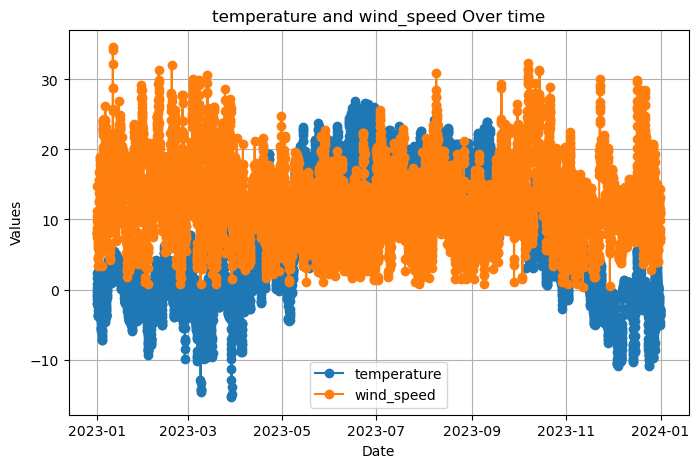

In [2]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 59.3294,
	"longitude": 18.0687,
	"start_date": "2023-01-01",
	"end_date": "2023-12-31",
	"hourly": ["temperature_2m", "rain", "snowfall", "wind_speed_10m"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_rain = hourly.Variables(1).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(2).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(3).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s"),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s"),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)




#transform
hourly_dataframe['year'] = hourly_dataframe['date'].dt.year
hourly_dataframe['month'] = hourly_dataframe['date'].dt.month
hourly_dataframe['day'] = hourly_dataframe['date'].dt.day

path="C:\\Users\\knigh\\Reassessment python\\weather.csv"


#Load
hourly_dataframe.to_csv(path, index= False)




# Data Analysis (calculate average temperature and humidity)
average_temperature = hourly_dataframe['temperature_2m'].mean()
average_humidity = hourly_dataframe['wind_speed_10m'].mean()

print("\nData Analysis:")
print(f"Average temperature: {average_temperature:.2f} °C")
print(f"Average wind_speed: {average_humidity:.2f}%")

# Data Visualization (create a simple line chart)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(hourly_dataframe['date'], hourly_dataframe['temperature_2m'], marker='o', label='temperature')
plt.plot(hourly_dataframe['date'], hourly_dataframe['wind_speed_10m'], marker='o', label='wind_speed')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('temperature and wind_speed Over time')
plt.legend()
plt.grid(True)
plt.show()



Data Analysis:
Average temperature: 7.19 °C
Average wind_speed: 12.46 m/s


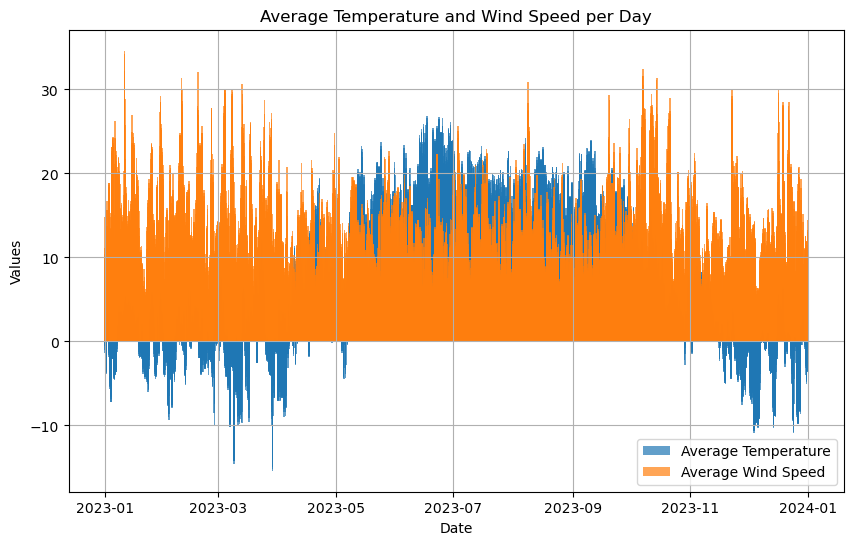

In [3]:
# Aggregate data by day
daily_aggregated = hourly_dataframe.groupby('date').agg({
    'temperature_2m': 'mean',
    'wind_speed_10m': 'mean'
}).reset_index()

# Data Analysis (calculate average temperature and wind speed)
average_temperature = daily_aggregated['temperature_2m'].mean()
average_wind_speed = daily_aggregated['wind_speed_10m'].mean()

print("\nData Analysis:")
print(f"Average temperature: {average_temperature:.2f} °C")
print(f"Average wind_speed: {average_wind_speed:.2f} m/s")

# Data Visualization (create a bar chart)
plt.figure(figsize=(10, 6))
plt.bar(daily_aggregated['date'], daily_aggregated['temperature_2m'], alpha=0.7, label='Average Temperature')
plt.bar(daily_aggregated['date'], daily_aggregated['wind_speed_10m'], alpha=0.7, label='Average Wind Speed')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Average Temperature and Wind Speed per Day')
plt.legend()
plt.grid(True)
plt.show()


Data Analysis:
Average temperature: 7.19 °C
Average wind_speed: 12.46 m/s


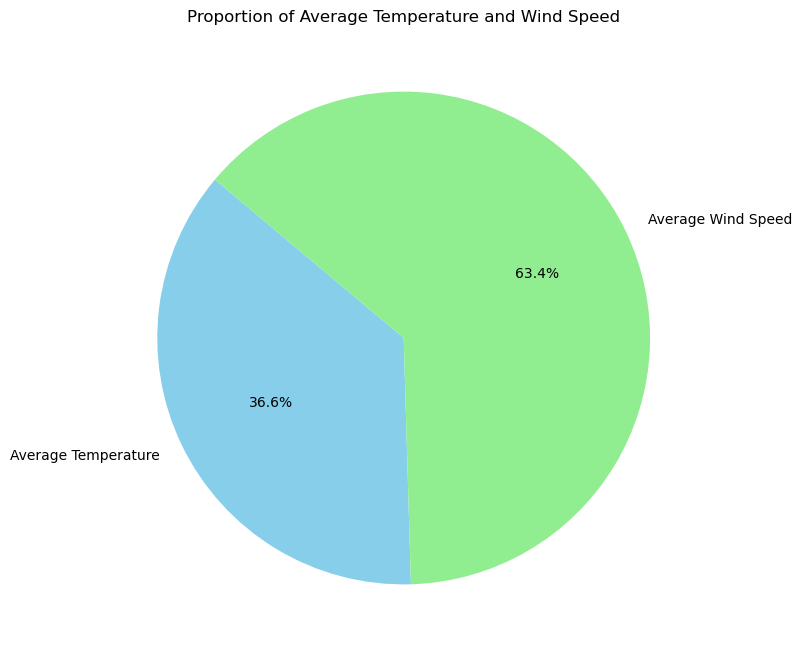

In [4]:
# Aggregate data by day
daily_aggregated = hourly_dataframe.groupby('date').agg({
    'temperature_2m': 'mean',
    'wind_speed_10m': 'mean'
}).reset_index()

# Data Analysis (calculate average temperature and wind speed)
average_temperature = daily_aggregated['temperature_2m'].mean()
average_wind_speed = daily_aggregated['wind_speed_10m'].mean()

print("\nData Analysis:")
print(f"Average temperature: {average_temperature:.2f} °C")
print(f"Average wind_speed: {average_wind_speed:.2f} m/s")

# Data Visualization (create a pie chart)
labels = ['Average Temperature', 'Average Wind Speed']
values = [average_temperature, average_wind_speed]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Average Temperature and Wind Speed')
plt.show()
